In [51]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading data 
df = pd.read_csv('hotel_bookings.csv')

In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
# Checking number of rows and columns
df.shape

(119390, 32)

In [7]:
## All column names
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
# Checking data type of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
## here reservation_status_date is in object form but we need to convert it into date as it is importanat for us

In [9]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'],format="%d/%m/%Y")

ValueError: time data "2015-07-01" doesn't match format "%d/%m/%Y", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [12]:
# Checking unique values in object datatype
for col in df.select_dtypes(include='object'):
    print(col)
    print(df[col].unique())
    print('----------------------')

hotel
['Resort Hotel' 'City Hotel']
----------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 'SYR' 'SGP' 'BDI'
 'SAU' 'VNM' 'PLW' 'QAT' 'EGY' 'PER' 'MLT' 'MWI' 'ECU' 'MDG' '

In [13]:
# Checking null values
df.isnull().sum()/len(df)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [14]:
## here company and agent column we will remove as it is not significant
df.drop(['agent','company'],inplace=True, axis=1)

In [15]:
df.dropna(inplace=True)## This will remove the rows having missing values

In [16]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [17]:
# Summary statistics of numerical columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [18]:
# removing outlier from adr column
df=df[df['adr']<5000]

In [19]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


## Data Visualization

In [20]:
# Calculating reservation cancelation percentage
cancled_percentage=df['is_canceled'].value_counts(normalize=True)*100
cancled_percentage

is_canceled
0    62.865337
1    37.134663
Name: proportion, dtype: float64

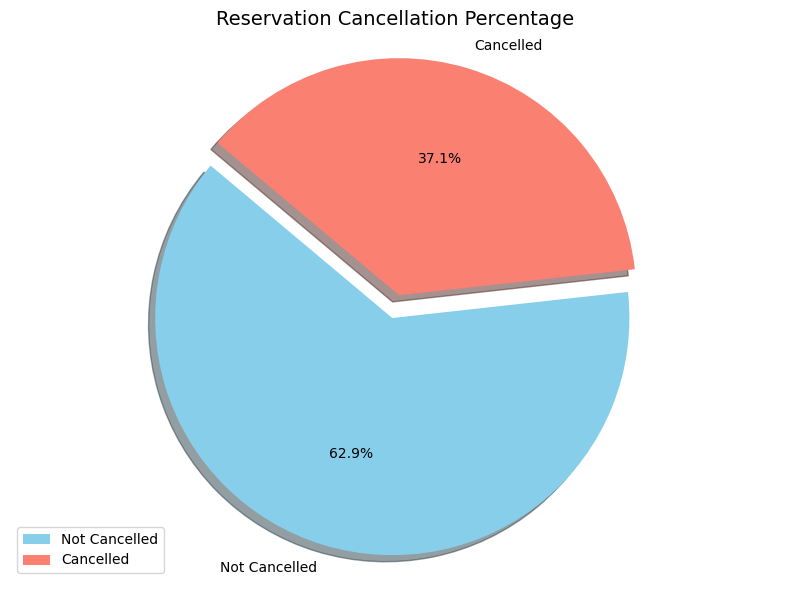

In [21]:
# Plotting pie chart for how much percentage of reservation is canceled and not canceled
labels = ['Not Cancelled', 'Cancelled']
colors = ['skyblue', 'salmon']
explode = (0, 0.1)  # Explode the 'Cancelled' slice
plt.figure(figsize=(8, 6))
plt.pie(cancled_percentage, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Reservation Cancellation Percentage', fontsize=14)
plt.legend(loc='lower left', fontsize=10)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


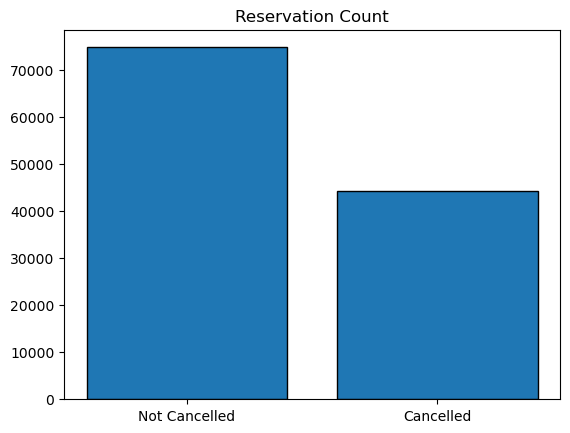

In [22]:
# Plotting bar garph to see total count of canceled and not canceled reservation.
plt.title('Reservation Count')
plt.bar(['Not Cancelled','Cancelled'],df['is_canceled'].value_counts(),edgecolor = 'k')
plt.show()

In [23]:
df['hotel'] = df['hotel'].astype('category')
df['is_canceled_cat'] = df['is_canceled'].map({0: 'Not Cancelled', 1: 'Cancelled'}).astype('category')

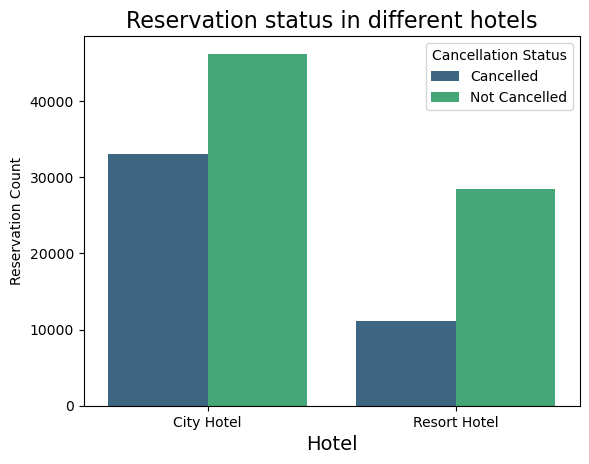

In [24]:
# Hotel wise status total count of canceled and not canceled bookings
snn.countplot(x='hotel', hue='is_canceled_cat', data=df, palette='viridis')
plt.title('Reservation status in different hotels', fontsize=16)
plt.xlabel('Hotel', fontsize=14)
plt.ylabel('Reservation Count', fontsize=10)

plt.legend(title='Cancellation Status', labels=['Cancelled', 'Not Cancelled'])

plt.show()

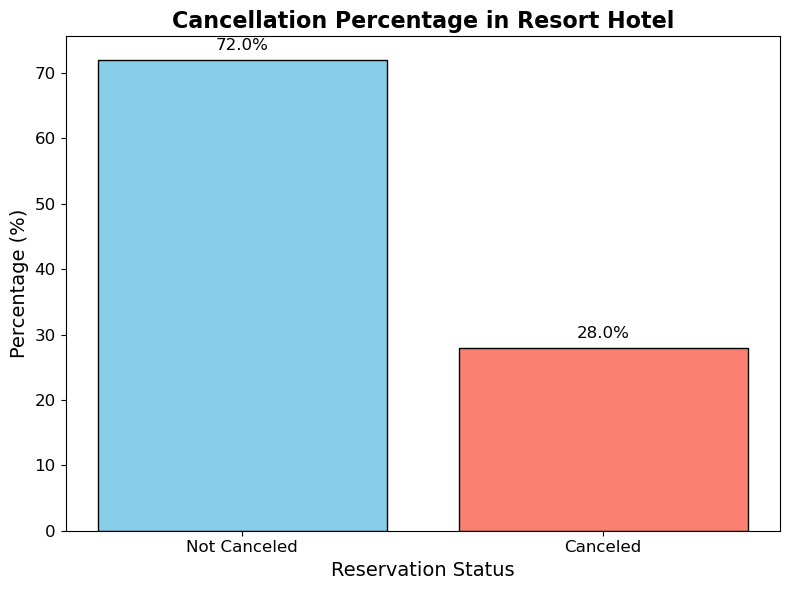

In [25]:
# Cancelation percentage in resort hotel
resort_hotel = df[df['hotel'] == 'Resort Hotel']
PerOfResortHotel = resort_hotel['is_canceled'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
bars = plt.bar(['Not Canceled', 'Canceled'], PerOfResortHotel, edgecolor='black', color=['skyblue', 'salmon'])
plt.title('Cancellation Percentage in Resort Hotel', fontsize=16, fontweight='bold')
plt.xlabel('Reservation Status', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
for bar, percentage in zip(bars, PerOfResortHotel):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()



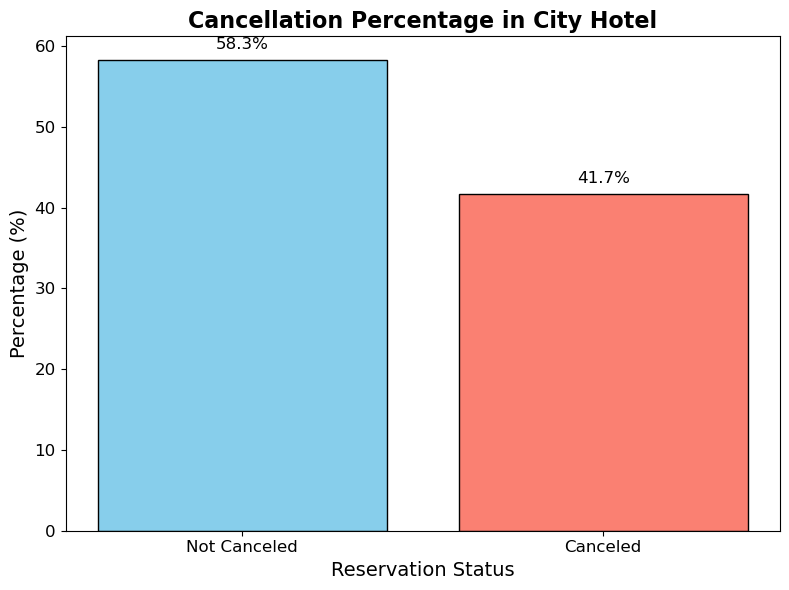

In [32]:
# Cancelation percentage in city hotel
city_hotel = df[df['hotel'] == 'City Hotel']
PerOfcity_hotel=city_hotel['is_canceled'].value_counts(normalize=True)*100

plt.figure(figsize=(8, 6))
bars = plt.bar(['Not Canceled', 'Canceled'], PerOfcity_hotel, edgecolor='black', color=['skyblue', 'salmon'])
plt.title('Cancellation Percentage in City Hotel', fontsize=16, fontweight='bold')
plt.xlabel('Reservation Status', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for bar, percentage in zip(bars, PerOfcity_hotel):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

In [26]:
resort_hotel

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled_cat
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,Not Cancelled
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,Not Cancelled
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,Not Cancelled
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,Not Cancelled
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,Not Cancelled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,1,No Deposit,0,Transient,89.75,0,0,Check-Out,2017-09-10,Not Cancelled
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,Not Cancelled
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,0,No Deposit,0,Transient,153.57,0,3,Check-Out,2017-09-12,Not Cancelled
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,0,No Deposit,0,Contract,112.80,0,1,Check-Out,2017-09-14,Not Cancelled


In [30]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
resort_hotel

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-02,9.633750
2015-01-18,0.000000
2015-01-21,37.301209
...,...
2017-09-08,101.012500
2017-09-09,147.778333
2017-09-10,145.272500


In [34]:
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


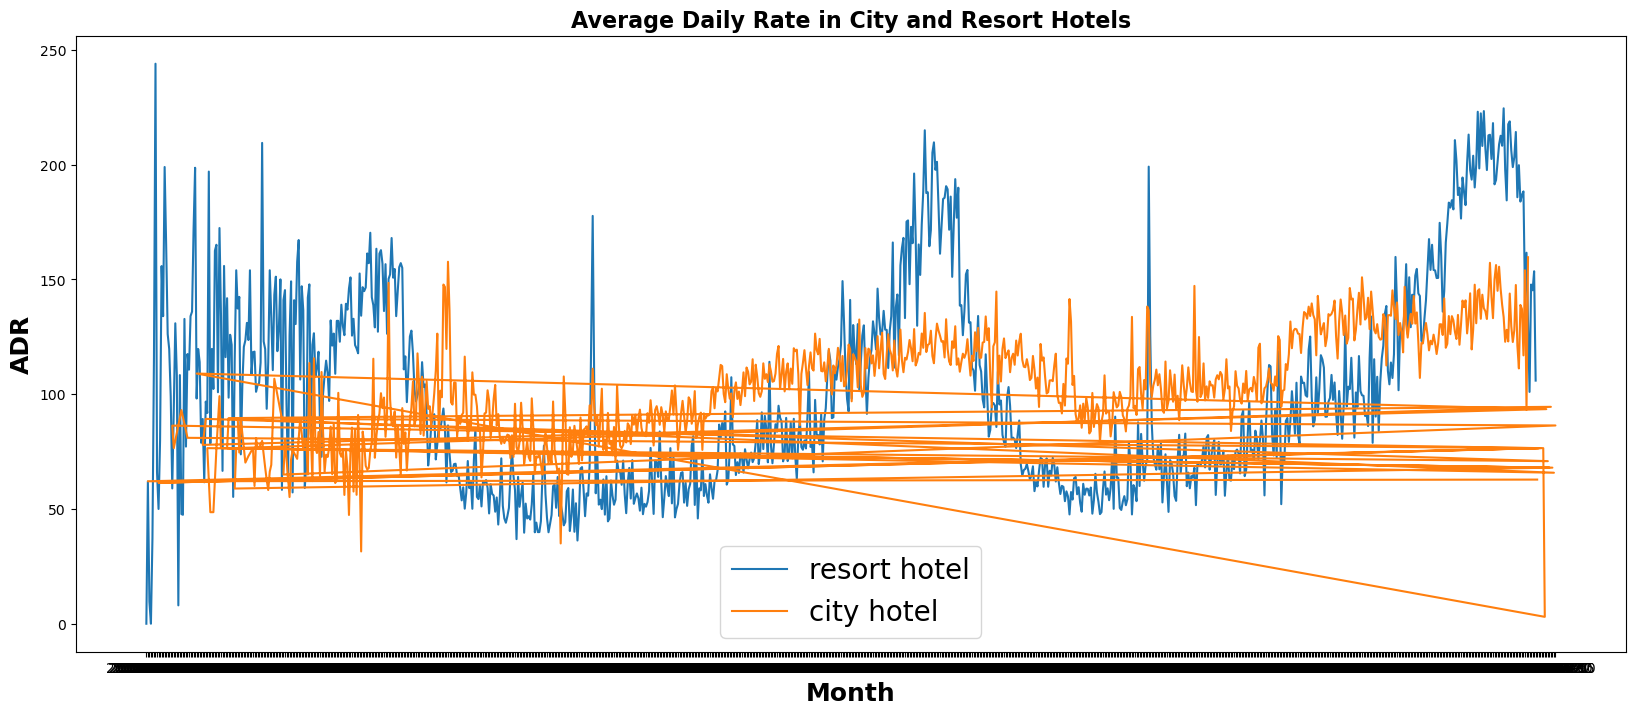

In [36]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort Hotels',fontsize=16, fontweight='bold')
plt.plot(resort_hotel.index,resort_hotel['adr'],label='resort hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label='city hotel')
plt.xlabel('Month', fontsize=18, fontweight='bold')
plt.ylabel('ADR', fontsize=18, fontweight='bold')
plt.legend(fontsize=20)

In [42]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [43]:
df['month']=df['reservation_status_date'].dt.month
df['month name']=pd.to_datetime(df['month'],format='%m').dt.strftime('%B')

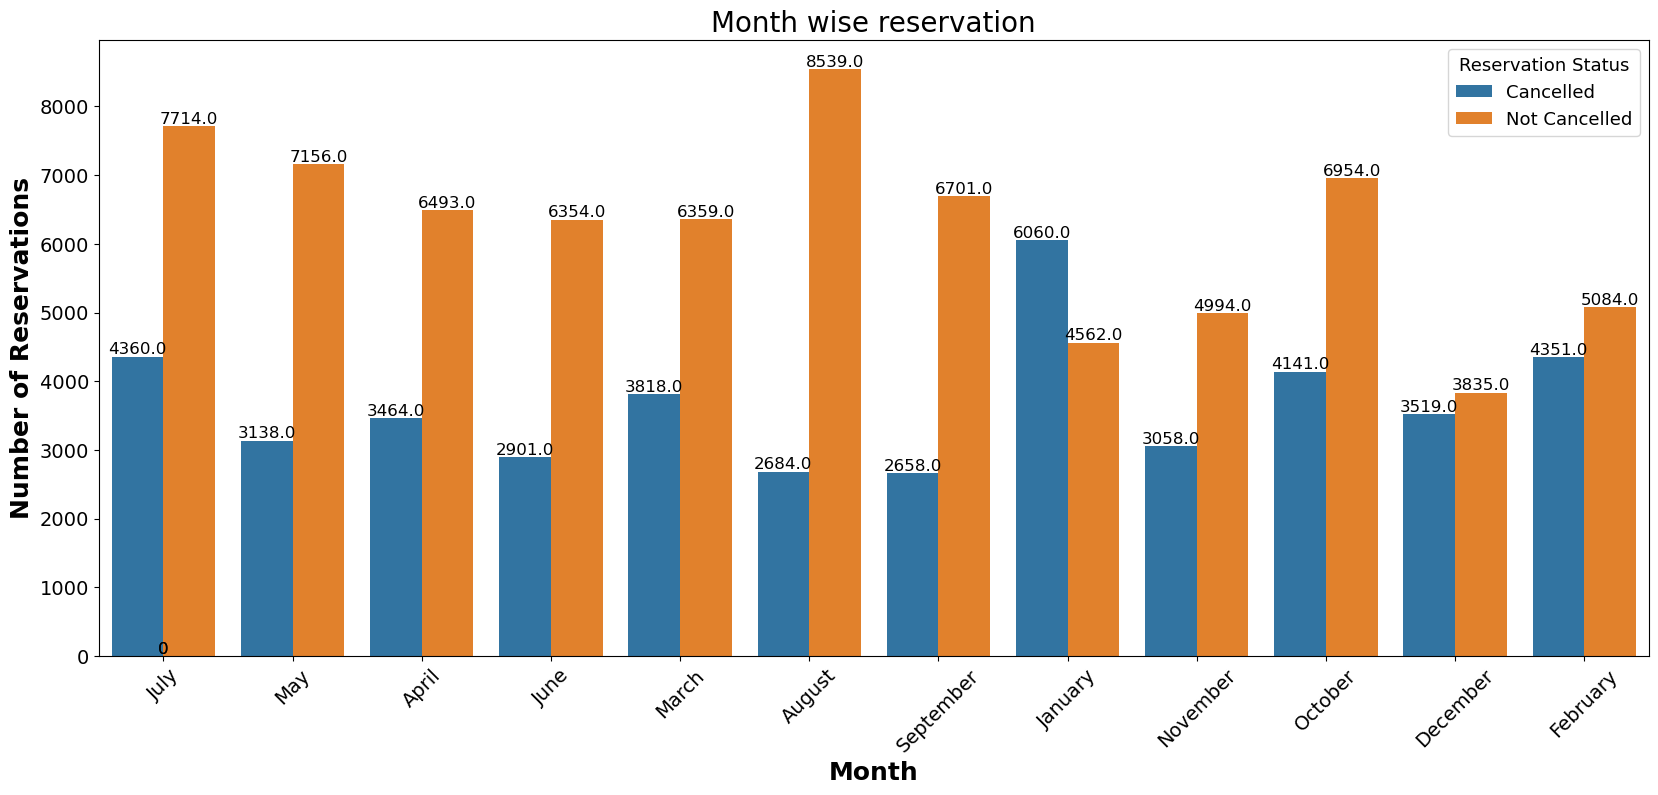

In [44]:
plt.figure(figsize=(20,8))
plt.title('Month wise reservation',fontsize=20)
ax1=snn.countplot(x='month name',hue='is_canceled_cat', data=df)
ax1
#plt.legend(['Cancelled','Not Cancelled'])
# Adding labels and grid
plt.xlabel('Month', fontsize=18, fontweight='bold')
plt.ylabel('Number of Reservations', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Reservation Status', title_fontsize='13', fontsize=13)
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')
# Adding background color

plt.show()

In [45]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_canceled_cat,month,month name
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,Not Cancelled,7,July
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,Not Cancelled,7,July


In [46]:
cancled=df[df['is_canceled']==1].groupby('month name')[['adr']].sum()
cancled

,adr
month name,
April,425315.23
August,325668.43
December,319272.65
February,447675.76
January,571203.57
July,481376.17
June,359003.34
March,424872.56
May,391438.08


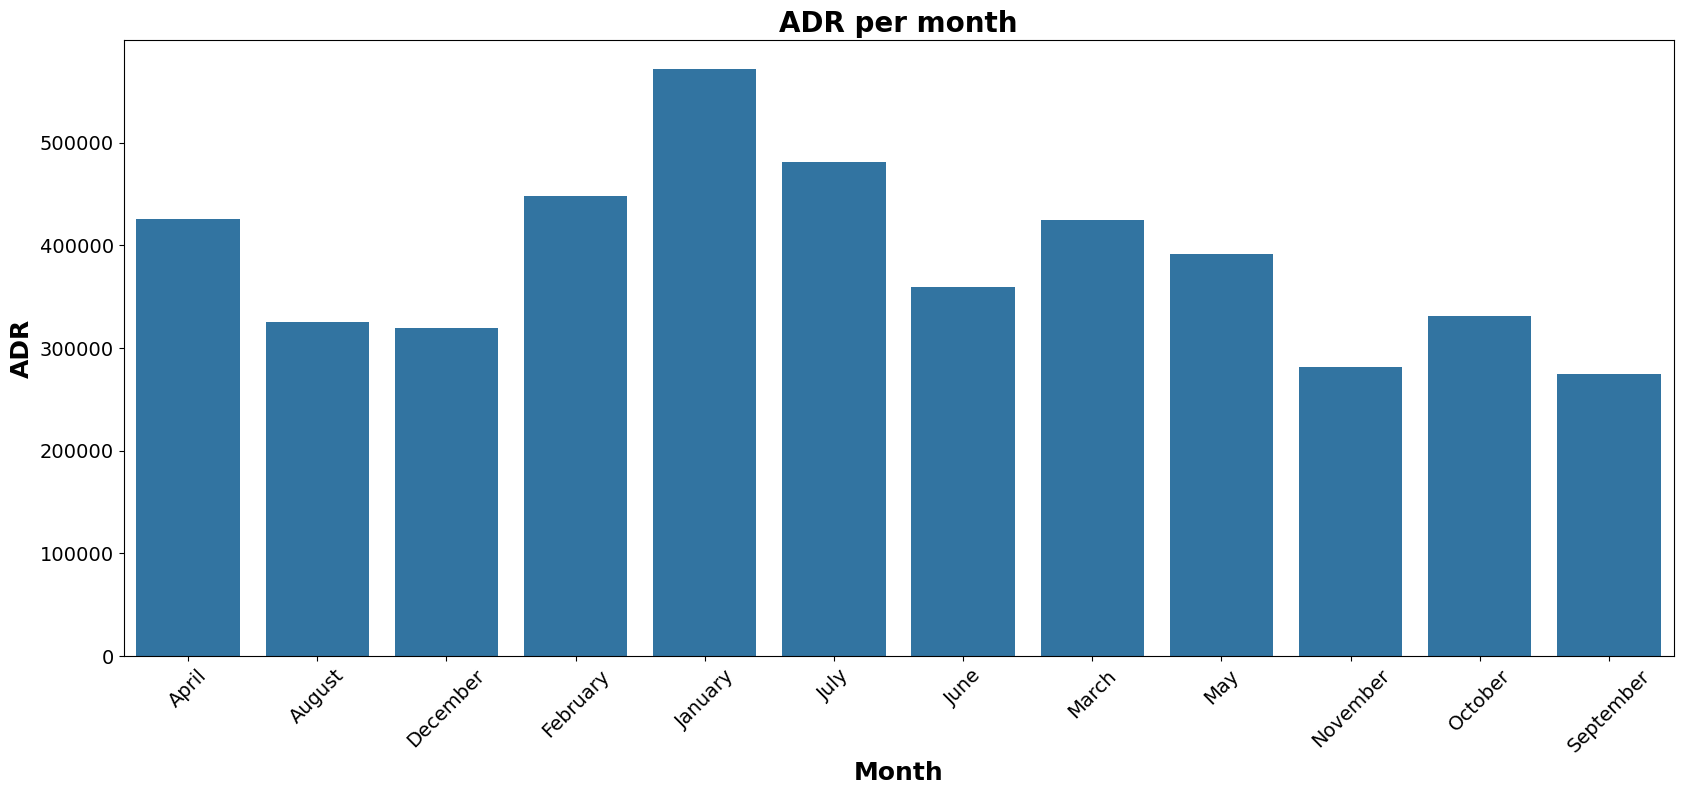

In [47]:
## price vs cancellation
plt.figure(figsize=(20,8))
plt.title('ADR per month',fontsize=20,fontweight='bold')
snn.barplot(x=cancled.index,y='adr',data=cancled)
plt.xlabel('Month', fontsize=18, fontweight='bold')
plt.ylabel('ADR', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.show()

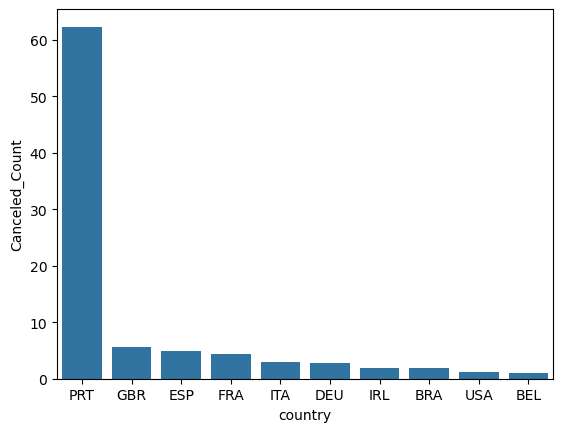

In [48]:
## Top 10 country wise cancellation
canceled_data=df[df['is_canceled']==1]
top10_country=pd.DataFrame(canceled_data['country'].value_counts(normalize=True)*100).head(10)
top10_country.columns = ['Canceled_Count']
top10_country = top10_country.reset_index()
snn.barplot(x='country',y='Canceled_Count',data=top10_country)
plt.show()

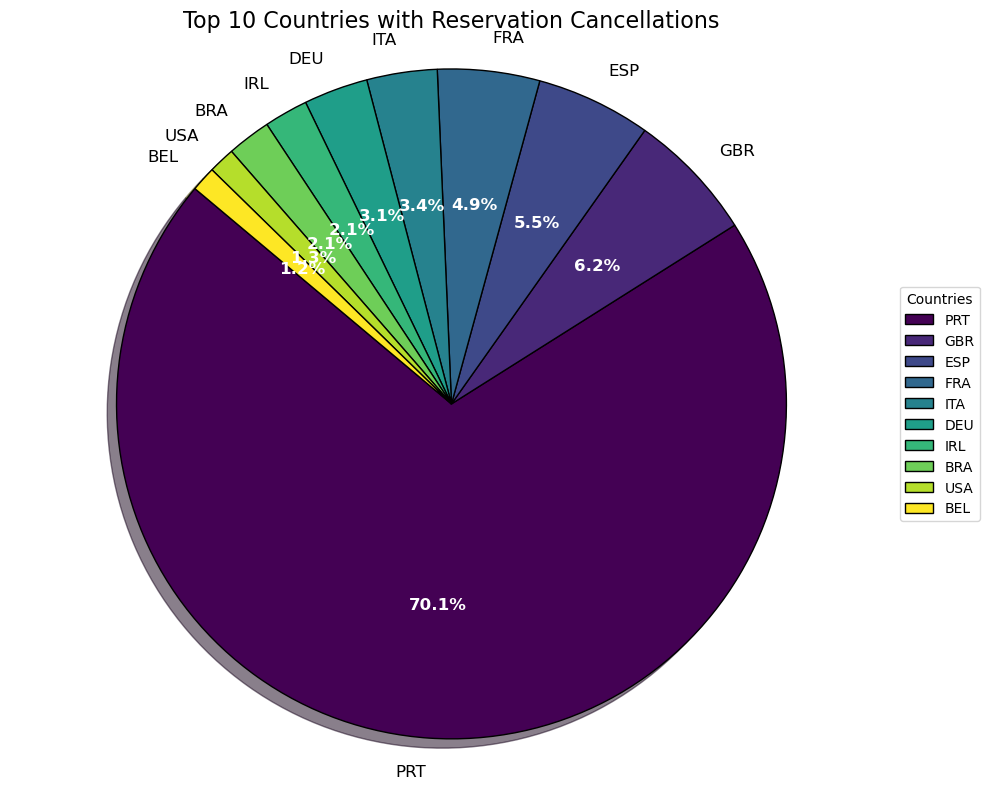

In [49]:
canceled_data = df[df['is_canceled'] == 1]
top10_country = canceled_data['country'].value_counts().head(10)
colors = plt.cm.viridis(np.linspace(0, 1, len(top10_country)))
plt.figure(figsize=(10,8))
plt.title('Top 10 Countries with Reservation Cancellations', fontsize=16)
wedges, texts, autotexts = plt.pie(
    top10_country, 
    autopct='%1.1f%%', 
    labels=top10_country.index, 
    colors=colors, 
    startangle=140, 
    shadow=True, 
    wedgeprops={'edgecolor': 'black'}
)

for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')
    autotext.set_weight('bold')
plt.axis('equal')

plt.legend(wedges, top10_country.index, title="Countries", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()


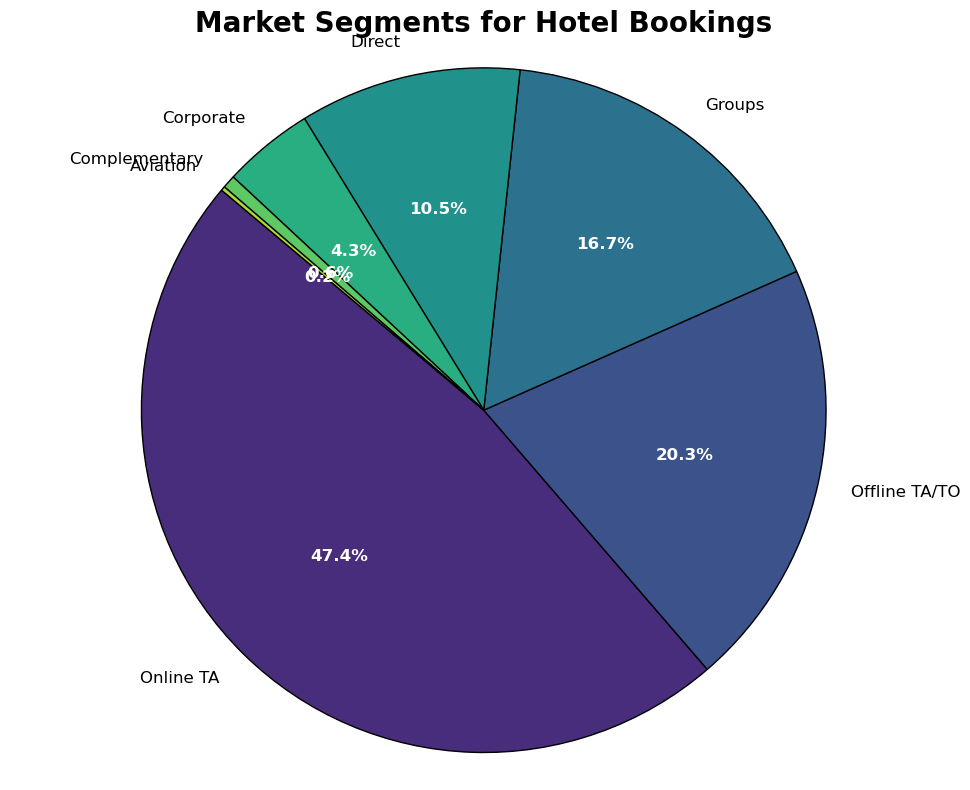

In [52]:
market_cap = df['market_segment'].value_counts()
colors = sns.color_palette('viridis', len(market_cap))
plt.figure(figsize=(10,8))
plt.title('Market Segments for Hotel Bookings',fontsize=20,fontweight='bold')
wedges, texts, autotexts = plt.pie(
    market_cap, 
    autopct='%1.1f%%', 
    labels=market_cap.index, 
    colors=colors, 
    startangle=140, 
    wedgeprops={'edgecolor': 'black'}
)

for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')
    autotext.set_weight('bold')

plt.axis('equal')
plt.tight_layout()
plt.show()


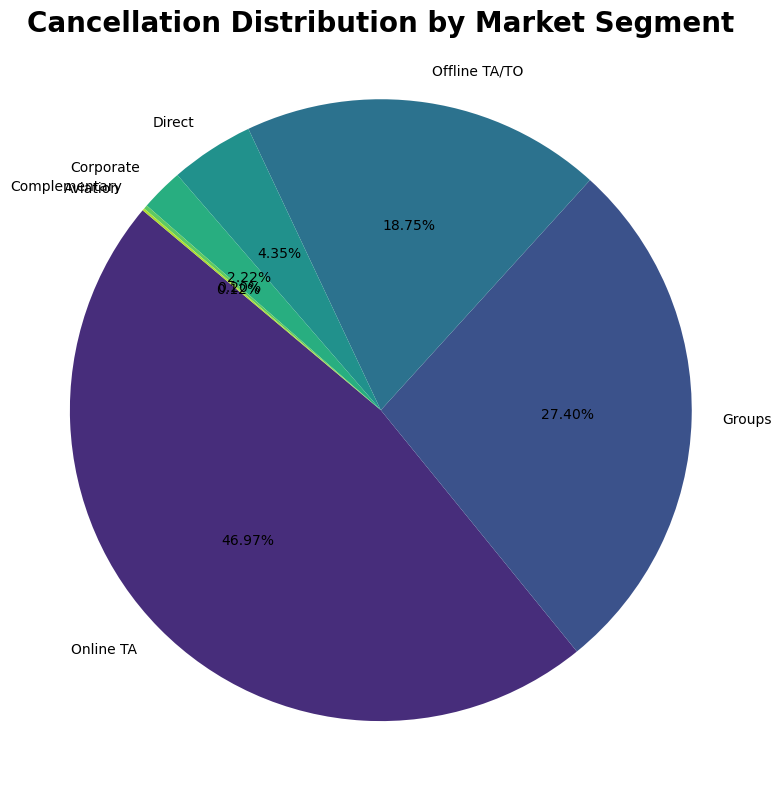

In [65]:
market_cap_canceled = canceled_data['market_segment'].value_counts()

plt.figure(figsize=(8, 8))
colors = colors = sns.color_palette('viridis', len(market_cap))  # Using a qualitative colormap for distinct colors
plt.pie(market_cap_canceled, autopct='%.2f%%', labels=market_cap_canceled.index, colors=colors, startangle=140)
plt.title('Cancellation Distribution by Market Segment',fontsize=20,fontweight='bold')
plt.axis('equal')  # Ensures the pie chart is circular
plt.tight_layout()  # Improves spacing

plt.show()


In [53]:
canceled_df_adr=canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values('reservation_status_date', inplace=True)

not_canceled_data=df[df['is_canceled']==0]
not_canceled_df_adr=not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values('reservation_status_date', inplace=True)

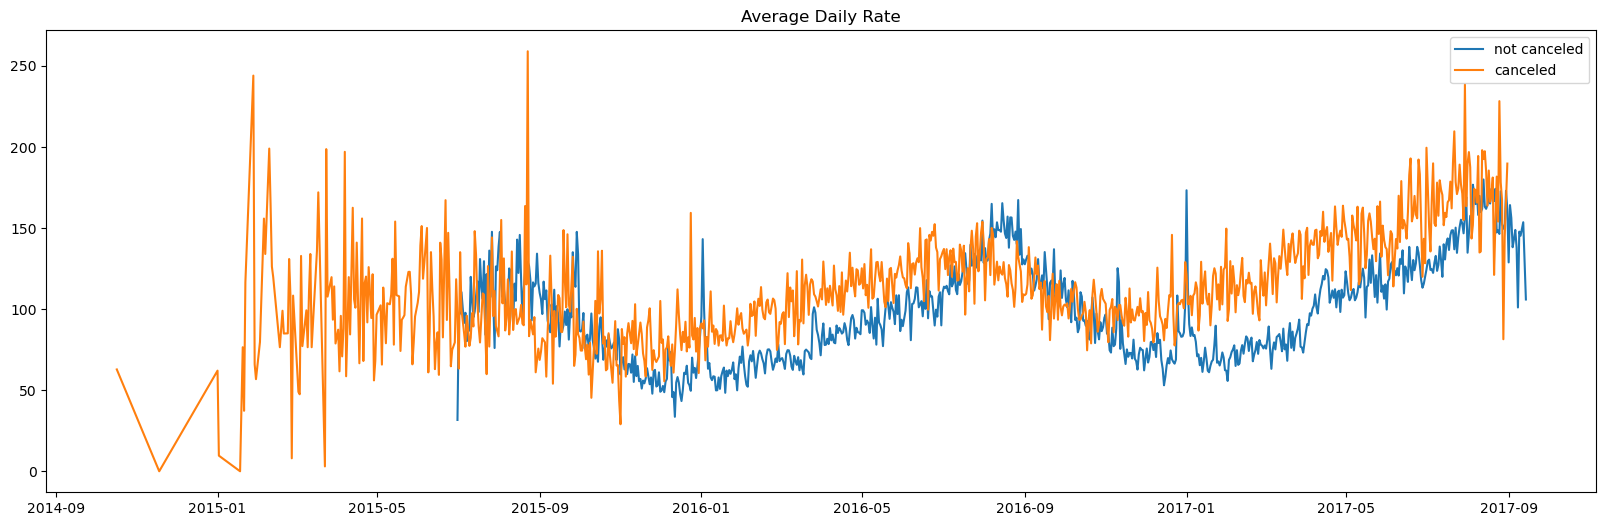

In [54]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate')
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'], label='not canceled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'], label='canceled')
plt.legend()
plt.show()
# 

In [55]:
## we will look into the data after 2015-07
canceled_df_adr=canceled_df_adr[(canceled_df_adr['reservation_status_date']>'2015-07') & (canceled_df_adr['reservation_status_date']<'2017-09')]
not_canceled_df_adr=not_canceled_df_adr[(not_canceled_df_adr['reservation_status_date']>'2015-07') & (not_canceled_df_adr['reservation_status_date']<'2017-09')]

In [56]:
canceled_df_adr

,reservation_status_date,adr
122,2015-07-02,63.317965
123,2015-07-03,135.106250
124,2015-07-04,99.937143
125,2015-07-06,85.172005
126,2015-07-07,76.830263
...,...,...
897,2017-08-26,178.200000
898,2017-08-27,167.300000
899,2017-08-28,81.416667
900,2017-08-29,144.253333


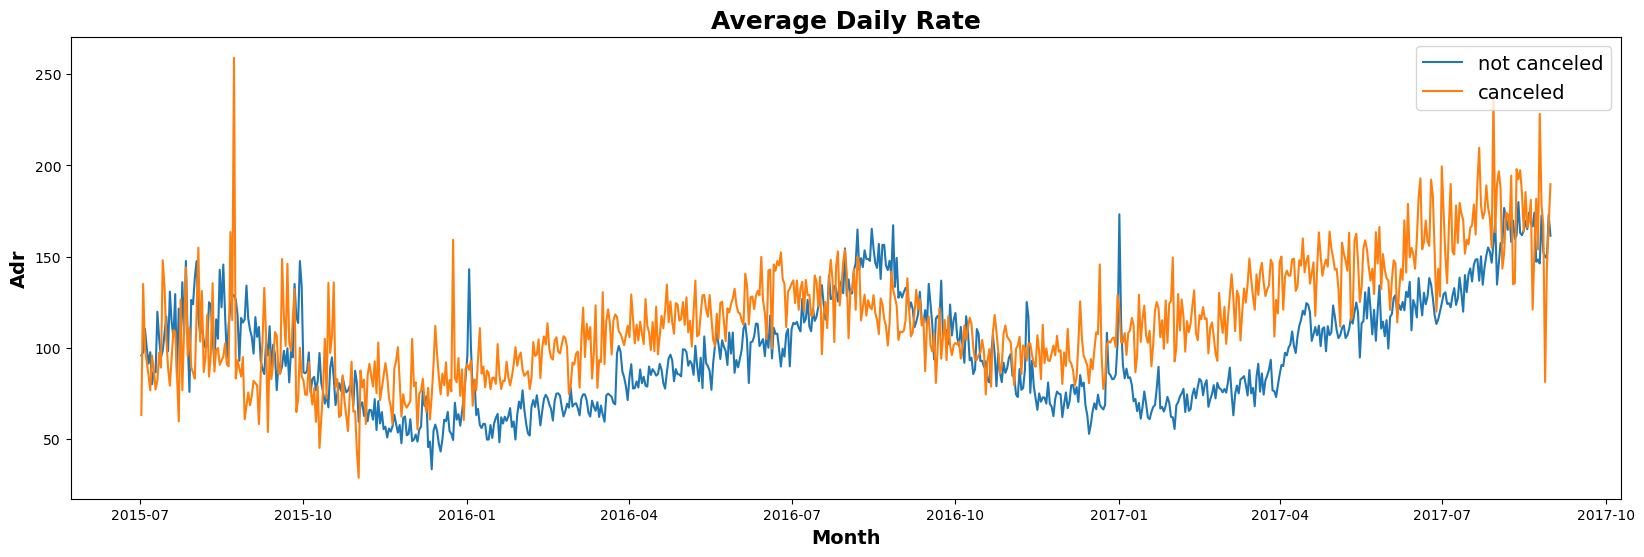

In [57]:
plt.figure(figsize=(20,6))
plt.title('Average Daily Rate',fontsize=18,fontweight='bold')
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'], label='not canceled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'], label='canceled')
plt.legend(loc='upper right',fontsize=14)
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Adr', fontsize=14, fontweight='bold')
plt.show()
# 